### Principal Components Analysis (PCA)

PCA is defined as an orthogonal linear transformation that transforms the data to a new coordinate system such that the greatest variance by some scalar projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.

Consider an ${\displaystyle n\times p}$ data matrix, X, with column-wise zero empirical mean (the sample mean of each column has been shifted to zero), where each of the n rows represents a different repetition of the experiment, and each of the p columns gives a particular kind of feature (say, the results from a particular sensor)

Mathematically, the transformation is defined by a set of size ${\displaystyle l}$ of p-dimensional vectors of weights or coefficients ${\displaystyle \mathbf {w} _{(k)}=(w_{1},\dots ,w_{p})_{(k)}}$ that map each row vector ${\displaystyle \mathbf {x} _{(i)}}$ of $X$ to a new vector of principal component scores ${\displaystyle \mathbf {t} _{(i)}=(t_{1},\dots ,t_{l})_{(i)}}$ given by:

- ${\displaystyle {t_{k}}_{(i)}=\mathbf {x} _{(i)}\cdot \mathbf {w} _{(k)}\qquad \mathrm {for} \qquad i=1,\dots ,n\qquad k=1,\dots ,l}$

in such a way that the individual variables ${\displaystyle t_{1},\dots ,t_{l}}$ of $t$ considered over the data set successively inherit the maximum possible variance from X, with each coefficient vector w constrained to be a unit vector (where ${\displaystyle l}$ is usually selected to be strictly less than ${\displaystyle p}$ to reduce dimensionality).

In order to maximize variance, the first weight vector $w(1)$ thus has to satisfy:
- ${\displaystyle \mathbf {w} _{(1)}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}(t_{1})_{(i)}^{2}\right\}=\arg \max _{\Vert \mathbf {w} \Vert =1}\,\left\{\sum _{i}\left(\mathbf {x} _{(i)}\cdot \mathbf {w} \right)^{2}\right\}}$

Equivalently, writing this in matrix form gives:
- ${\displaystyle \mathbf {w} _{(1)}=\arg \max _{\left\|\mathbf {w} \right\|=1}\left\{\left\|\mathbf {Xw} \right\|^{2}\right\}=\arg \max _{\left\|\mathbf {w} \right\|=1}\left\{\mathbf {w} ^{\mathsf {T}}\mathbf {X} ^{\mathsf {T}}\mathbf {Xw} \right\}}$

Since $w_{(1)}$ has been defined to be a unit vector, it equivalently also satisfies:
- ${\displaystyle \mathbf {w} _{(1)}=\arg \max \left\{{\frac {\mathbf {w} ^{\mathsf {T}}\mathbf {X} ^{\mathsf {T}}\mathbf {Xw} }{\mathbf {w} ^{\mathsf {T}}\mathbf {w} }}\right\}}$

The quantity to be maximised can be recognised as a Rayleigh quotient. A standard result for a positive semidefinite matrix such as $X^TX$ is that the quotient's maximum possible value is the largest eigenvalue of the matrix, which occurs when $w$ is the corresponding eigenvector.

With $w_{(1)}$ found, the first principal component of a data vector $x_{(i)}$ can then be given as a score $t_{1(i)} = x_{(i)} \cdot w_{(1)}$ in the transformed co-ordinates, or as the corresponding vector in the original variables, $\{x_{(i)} \cdot w_{(1)}\} w_{(1)}$.

In [4]:
import numpy as np
from utils import *

In [7]:
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

In [34]:
X.shape

(150, 4)

In [26]:
X = X - np.mean(X)
X

array([[ 1.6355,  0.0355, -2.0645, -3.2645],
       [ 1.4355, -0.4645, -2.0645, -3.2645],
       [ 1.2355, -0.2645, -2.1645, -3.2645],
       [ 1.1355, -0.3645, -1.9645, -3.2645],
       [ 1.5355,  0.1355, -2.0645, -3.2645],
       [ 1.9355,  0.4355, -1.7645, -3.0645],
       [ 1.1355, -0.0645, -2.0645, -3.1645],
       [ 1.5355, -0.0645, -1.9645, -3.2645],
       [ 0.9355, -0.5645, -2.0645, -3.2645],
       [ 1.4355, -0.3645, -1.9645, -3.3645],
       [ 1.9355,  0.2355, -1.9645, -3.2645],
       [ 1.3355, -0.0645, -1.8645, -3.2645],
       [ 1.3355, -0.4645, -2.0645, -3.3645],
       [ 0.8355, -0.4645, -2.3645, -3.3645],
       [ 2.3355,  0.5355, -2.2645, -3.2645],
       [ 2.2355,  0.9355, -1.9645, -3.0645],
       [ 1.9355,  0.4355, -2.1645, -3.0645],
       [ 1.6355,  0.0355, -2.0645, -3.1645],
       [ 2.2355,  0.3355, -1.7645, -3.1645],
       [ 1.6355,  0.3355, -1.9645, -3.1645],
       [ 1.9355, -0.0645, -1.7645, -3.2645],
       [ 1.6355,  0.2355, -1.9645, -3.0645],
       [ 1

In [27]:
eigenvalues, eigenvectors = np.linalg.eig(np.cov(X.T))
eigenvalues, eigenvectors

(array([4.22824171, 0.24267075, 0.0782095 , 0.02383509]),
 array([[ 0.36138659, -0.65658877, -0.58202985,  0.31548719],
        [-0.08452251, -0.73016143,  0.59791083, -0.3197231 ],
        [ 0.85667061,  0.17337266,  0.07623608, -0.47983899],
        [ 0.3582892 ,  0.07548102,  0.54583143,  0.75365743]]))

In [28]:
eigenvalues = eigenvalues[np.argsort(eigenvalues)[::-1]]
eigenvalues

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [29]:
eigenvectors = eigenvectors.T
eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [ ]:
eigenvectors = eigenvectors[np.argsort(eigenvalues)[::-1]]
eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143],
       [ 0.31548719, -0.3197231 , -0.47983899,  0.75365743]])

In [ ]:
np.dot(X, eigenvectors[0:2].T)

array([[-2.35018433, -1.70410732],
       [-2.38020039, -1.20770885],
       [-2.55504927, -1.23976065],
       [-2.41140156, -1.06641109],
       [-2.39477524, -1.71146458],
       [-1.94691834, -2.12604052],
       [-2.48659645, -1.29524869],
       [-2.29220368, -1.54809503],
       [-2.55244143, -0.80639832],
       [-2.3388145 , -1.27093583],
       [-2.17300579, -2.02977897],
       [-2.27881393, -1.39944001],
       [-2.45216797, -1.14959807],
       [-2.88986245, -0.87331548],
       [-2.31080909, -2.56347471],
       [-2.05209774, -2.7227724 ],
       [-2.28958658, -2.19538959],
       [-2.31435541, -1.69655922],
       [-1.86587903, -2.25754911],
       [-2.2540451 , -1.89827038],
       [-1.97631492, -1.77605601],
       [-2.20976393, -1.81770613],
       [-2.88199812, -1.51817814],
       [-1.96879188, -1.48341893],
       [-2.02181275, -1.34742821],
       [-2.17272761, -1.23869319],
       [-2.13487878, -1.51566156],
       [-2.22837861, -1.75242893],
       [-2.30559342,

In [5]:
class PCA():
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    
    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        
        # covariance, function needs samples as colums
        cov = np.cov(X.T)
        
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        
        # eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]
        
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

Shape of X: (150, 4)
Shape of transformed X: (150, 2)


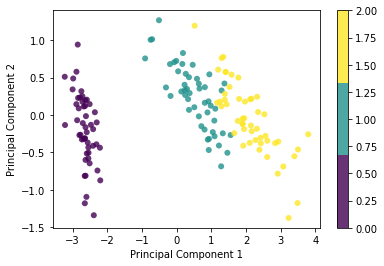

In [6]:
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

# Project the data onto the 2 primary principal components
pca = PCA(2)
pca.fit(X)
X_projected = pca.transform(X)

print("Shape of X:", X.shape)
print("Shape of transformed X:", X_projected.shape)

x1 = X_projected[:, 0]
x2 = X_projected[:, 1]

plt.scatter(
    x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()

In [7]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [9]:
pca.transform(X)

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,